In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City and Ride Dat
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


In [3]:
# Combine the data into a single dataset
ridecity_df = pd.merge(city_data,ride_data,on="city")
ridecity_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

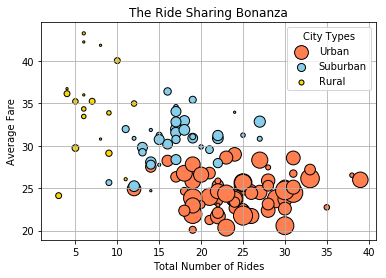

In [4]:
# Obtain the x and y coordinates for each of urban_suburban_rural
urban_df = ridecity_df[ridecity_df["type"]=="Urban"]
suburban_df = ridecity_df[ridecity_df["type"]=="Suburban"]
rural_df = ridecity_df[ridecity_df["type"]=="Rural"]

#creating circle sizes for the 3's. urban_suburban_rural
#ride id from data helps provide counts
#the more the ride id the almost the bigger the circle
urban_rides = urban_df.groupby(["city"]).count()["ride_id"] 
suburban_rides = suburban_df.groupby(["city"]).count()["ride_id"]
rural_rides = rural_df.groupby(["city"]).count()["ride_id"]

#mean function used instead of adding them.
rural_fare = rural_df.groupby(["city"]).mean()["fare"]
suburban_fare = suburban_df.groupby(["city"]).mean()["fare"]
urban_fare = urban_df.groupby(["city"]).mean()["fare"]

#mean function used instead of adding them.
rural_drivernumber = rural_df.groupby(["city"]).mean()["driver_count"] 
suburban_drivernumber = suburban_df.groupby(["city"]).mean()["driver_count"]
urban_drivernumber = urban_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for the 3's, urban_suburban_rural
plt.scatter(urban_rides,urban_fare, s=5*urban_drivernumber, c="coral",marker= "o", label= "Urban", edgecolors="black" )
plt.scatter(suburban_rides,suburban_fare, s=5*suburban_drivernumber, c="skyblue",marker= "o", label= "Suburban", edgecolors="black")
plt.scatter(rural_rides,rural_fare, s=5*rural_drivernumber, c="gold",marker= "o", label= "Rural",edgecolors="black" )


# Incorporate the other graph properties
plt.title("The Ride Sharing Bonanza")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.grid(True)

# Create a legend
# The legend helps to create somewhat a lebal for the plot
plt.legend(loc="best", title= "City Types")



Total Fares by City Type


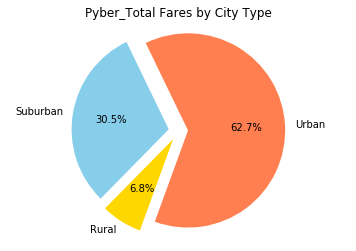

In [5]:
# % of Total Fares by City Type
total_fares_urb = ridecity_df['fare'].sum()
total_fares_sub = ridecity_df['fare'].sum()
total_fares_rural = ridecity_df['fare'].sum()

# Calculate Type Percents
faretype_percent = 100*ridecity_df.groupby(["type"]).sum()["fare"]/ridecity_df["fare"].sum()


# The values of each section of the pie chart
sizes = [total_fares_urb, total_fares_sub, total_fares_rural]
number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].fare.sum()
number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].fare.sum()
number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].fare.sum()
number_of_fares = ridecity_df.fare.sum()



# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]


# Tells matplotlib to seperate the "Pie" section from the others
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=-110)
plt.axis('equal')
plt.title('Pyber_Total Fares by City Type')
plt.savefig("../Images/pyber_Total Fares by City Type.png")
plt.show()



# Save Figure

## Total Rides by City Type

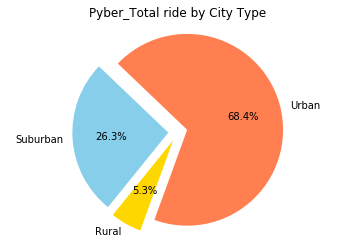

In [19]:
# Total Rides by City Type
total_ride_urb = ridecity_df['city'].sum()
total_ride_sub = ridecity_df['city'].sum()
total_ride_rural = ridecity_df['city'].sum()


# The values of each section of the pie chart
sizes = [total_fares_urb, total_fares_sub, total_fares_rural]
number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].city.count()
number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].city.count()
number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].city.count()
number_of_fares = ridecity_df.fare.sum()




# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]
# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]


# Tells matplotlib to seperate the "Pie" section from the others
explode = (0.1, 0.1, 0.1)

 


plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=-110)
plt.axis('equal')
plt.title('Pyber_Total ride by City Type')
plt.savefig("../Images/pyber_Total Fares by City Type.png")
plt.show()



# Save Figure

 Total Drivers by City Type

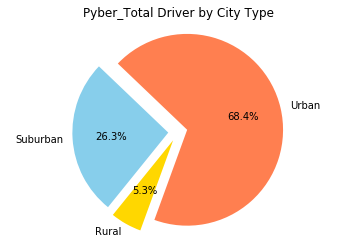

In [20]:



# The values of each section of the pie chart
sizes = [total_fares_urb, total_fares_sub, total_fares_rural]
number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].driver_count.count()
number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].driver_count.count()
number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].driver_count.count()
number_of_fares = ridecity_df.city.count()



# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]


# Tells matplotlib to seperate the "Pie" section from the others
explode = (0.1, 0.1, 0.1)

 


plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=-110)
plt.axis('equal')
plt.title('Pyber_Total Driver by City Type')
plt.savefig("../Images/pyber_Total Fares by City Type.png")
plt.show()


# Save Figure

